In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
#Part 1#

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',names = column_names,delim_whitespace = True)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

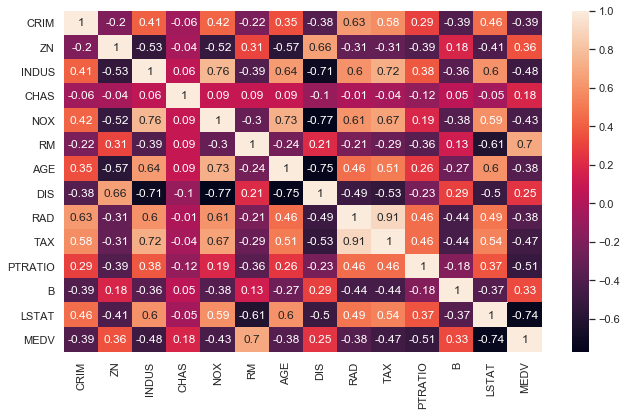

In [ ]:
sns.set(rc={'figure.figsize':(10.7,6.27)})
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
data.drop(columns="RAD",inplace=True)
df_1 = data.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
df_2 = StandardScaler().fit_transform(df_1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_2[:,:-1], df_2[:,-1], test_size = 0.30)

In [ ]:
### Code for metrics calculation
def metrica(model , X_train , y_train , X_test , y_test,p,lambda_= None):
    regressor = model(lambda_)                #Initializing Model
    regressor.fit(X_train,y_train)            #Fitting Model
    prediction = regressor.predict(X_test)    # Predicting Model

    # Calculating metrics RMSE and R^2

    rmse =  metrics.mean_squared_error(y_test,prediction,squared=False)
    r2 = metrics.r2_score(y_test,prediction)

    if p == True:
        return print( "RMSE is " + str(rmse) + " and R^2 is " + str(r2) )
    else:
        return np.array([rmse , r2])

In [ ]:
#Part 2#

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
metrica(Lasso,X_train,y_train,X_test,y_test,p = True,lambda_= 0.1)

RMSE is 0.4926773167577661 and R^2 is 0.7175970520196233


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
metrica(Ridge,X_train,y_train,X_test,y_test,p = True,lambda_ = 1.0)

RMSE is 0.4572274988423628 and R^2 is 0.756774684617952


MLR

In [ ]:
from sklearn.linear_model import LinearRegression
metrica(LinearRegression,X_train,y_train,X_test,y_test,p = True)

RMSE is 0.4546459024483302 and R^2 is 0.7595135266524586



KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
metrica(KNeighborsRegressor,X_train,y_train,X_test,y_test,p = True,lambda_=6)

RMSE is 0.443885932481712 and R^2 is 0.7707618714106658


In [ ]:
#Part 3#

Cross Validation

In [ ]:
class cv:
    def __init__(self,model,df,k_fold,lambda_=None):
        self.model = model
        self.X  = df[:,:-1]
        self.y  = df[:,-1]
        self.k_fold  = k_fold
        self.lambda_ = lambda_

    def compute(self):
        kf = KFold(n_splits=self.k_fold)
        regressor = self.model(self.lambda_)
        a = np.empty(self.k_fold,dtype=np.float64)
        b = np.empty(self.k_fold,dtype=np.float64)
        count = -1
        for train_index, test_index in kf.split(self.X):
            count = count +1
            X_train, X_test = self.X[train_index], self.X[test_index]
            y_train, y_test = self.y[train_index], self.y[test_index]
            regressor.fit(X_train,y_train)
            prediction = regressor.predict(X_test)
            rmse_ =  metrics.mean_squared_error(y_test,prediction,squared=False)
            r2_ = metrics.r2_score(y_test,prediction)
            a[count]=rmse_
            b[count]=r2_
        self.rmse = a
        self.r2 = b
        return self

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
cross_valid_lasso = cv(Lasso,df_2,6,0.11)
cross_valid_lasso.compute();

In [ ]:
print("Mean of RMSE is "+ str(cross_valid_lasso.rmse.mean()))
print("Mean of R^2 is " + str(cross_valid_lasso.r2.mean()))

Mean of RMSE is 0.6344573724396647
Mean of R^2 is 0.37885026585195


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
cross_valid_ridge = cv(Ridge,df_2,6,0.11)
cross_valid_ridge.compute();

In [ ]:
print("Mean of RMSE is "+ str(cross_valid_ridge.rmse.mean()))
print("Mean of R^2 is " + str(cross_valid_ridge.r2.mean()))

Mean of RMSE is 0.6080686929673274
Mean of R^2 is 0.445698897519541


MLR

In [ ]:
from sklearn.linear_model import LinearRegression
cross_valid_MLR = cv(LinearRegression,df_2,6)
cross_valid_MLR.compute();

In [ ]:
print("Mean of RMSE is "+ str(cross_valid_MLR.rmse.mean()))
print("Mean of R^2 is " + str(cross_valid_MLR.r2.mean()))

Mean of RMSE is 0.5978366537919337
Mean of R^2 is 0.47192647171959473


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
cross_valid_knn = cv(KNeighborsRegressor,df_2,6,9)
cross_valid_knn.compute();

In [ ]:
print("Mean of RMSE is "+ str(cross_valid_knn.rmse.mean()))
print("Mean of R^2 is " + str(cross_valid_knn.r2.mean()))

Mean of RMSE is 0.5640308445081575
Mean of R^2 is 0.5466415423768388


In [ ]:
#Part 4#

Presence of outliers

In [ ]:
#Loading dataset again#
names_1 = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
dat_1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',names = names_1,delimiter = r'\s+')
dat_1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
dat_1.shape

(506, 14)

In [ ]:
dat_1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#dropping these columns since we can see from above that min value,25% quartile and 50% quartile values are zero for CHAS and ZN#
dat_1 = dat_1.drop(["CHAS","ZN"],axis = 1) 

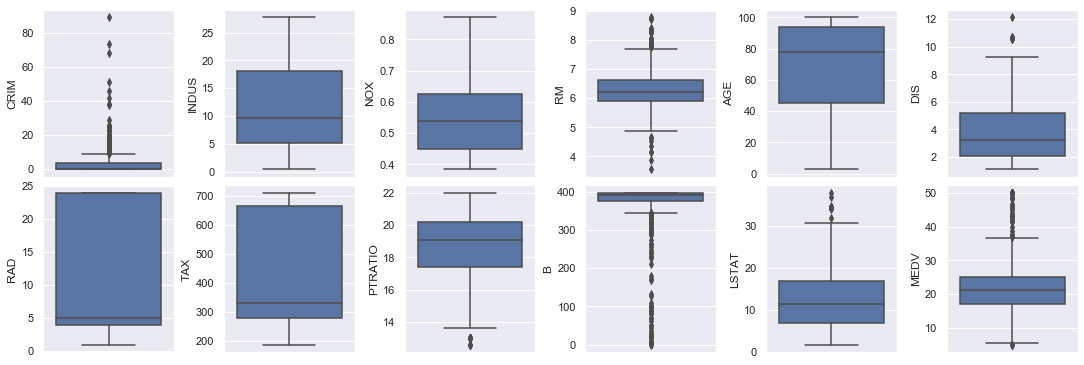

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in data_1.columns:
  sns.boxplot(y=i, data=dat_1, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [ ]:
#checking percentage and amount of outliers
for i in dat_1.columns:
  dat_1.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(dat_1[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = dat_1[i][(dat_1[i] < lower_bound) | (dat_1[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/dat_1[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in CRIM is 13.04% with count 66
Outliers in INDUS is 0.00% with count 0
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40
